<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S09-Support-Vector-Machines/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



#PASO 1 Obtención de datos

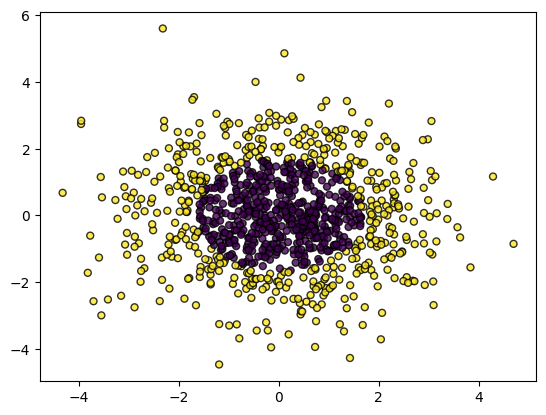

In [1]:
#create two gaussian distributions using make_gaussian_quantiles

from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

#generate 2D normally distributed data
X1, Y1 = make_gaussian_quantiles(cov=2.,
                                    n_samples=1000, n_features=2,
                                    n_classes=2, random_state=1)

# plot  data. Seaborn, blue a red color, transparency.

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k', alpha=0.8)
plt.show()

# PASO 2: Manipulación de datos


In [3]:

from sklearn.model_selection import train_test_split

# entrenamiento 60%, prueba 20%, validación 20%
X_train, X_temp, y_train, y_temp = train_test_split(X1, Y1, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'entrenamiento: {len(X_train)}')
print(f'validación: {len(X_val)}')
print(f'prueba: {len(X_test)}')


entrenamiento: 600
validación: 200
prueba: 200


# PASO 3: Exploración de Datos
Se crean tres gráficos para visualizar cómo se distribuyen los datos de entrenamiento, validación y prueba.
esto es permite visualizar rápidamente la distribución de los datos


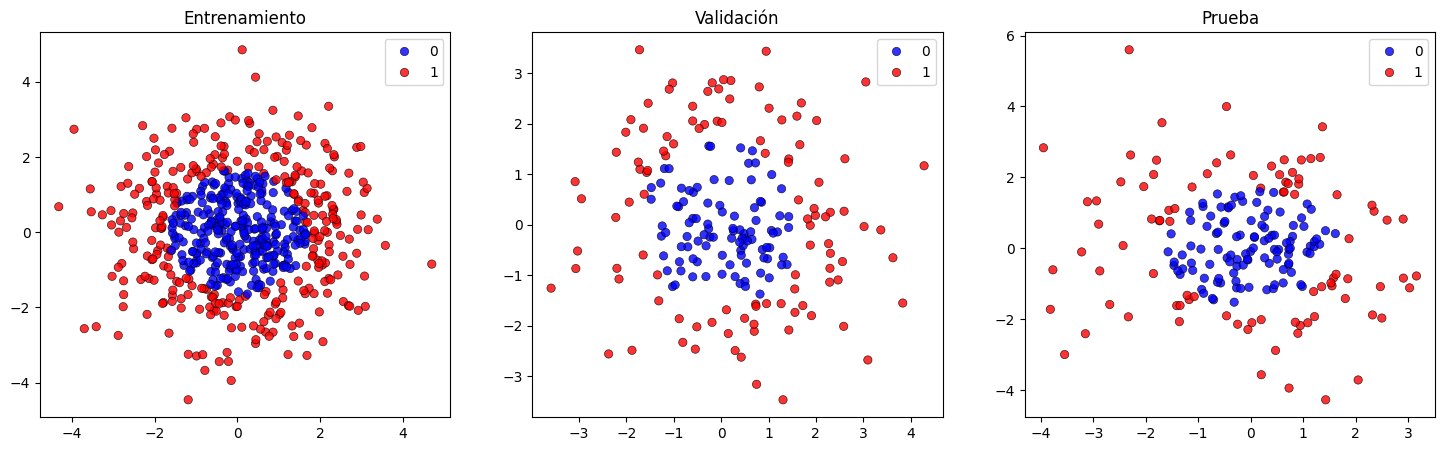

In [10]:
# Graficar conjuntos
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(18,5))

datasets = [(X_train, y_train, 'Entrenamiento'), 
            (X_val, y_val, 'Validación'), 
            (X_test, y_test, 'Prueba')]

for ax, (X, y, title) in zip(axes, datasets):
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette=['blue', 'red'], edgecolor='k', alpha=0.8, ax=ax)
    ax.set_title(title)

plt.show()

# PASO 4: Modelamiento de Datos (Machine Learning)

Se entrena un clasificador SVM con kernel Gaussiano **rbf** usando los datos de entrenamiento, y luego evalúa su desempeño en el conjunto de validación mostrando métricas como precisión, recall y f1-score.
En este caso precisión mustra cuantas veces acertó el módelo.
Recall nos permité saber si el módelo deja muchos casos sin detectar.
Y F1-Score hace un balance entre Precisión y Recall en un solo valor.
Estas métricas son útiles nos dicen si el modelo acierta y cómo lo hace en cada clase, permitiendonos ajustar los parámetros del módelo para buscar mejor desempeño.

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(X_train, y_train)

y_val_pred = svm.predict(X_val)
print('Reporte :')
print(classification_report(y_val, y_val_pred))

Reporte :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        96
           1       0.99      0.99      0.99       104

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



# PASO 5: Interpretación de los Resultados

De los resultados anteriores podemos inferir que el modelo está funcionando correctamente: tiene un 99% de precisión, recall y f1-score en ambas clases, lo que significa que casi no comete errores ni deja casos sin detectar. Además, la precisión general confirma que el modelo clasifica correctamente casi todos los ejemplos del conjunto de validación.

Esto sugiere que el SVM con kernel gaussiano y los parámetros elegidos (C=1.0, gamma='scale') está bien ajustado al problema.

Sin embargo, variaremos los parametros C, gamma para ver como se comporta.

In [7]:
parametros = [
    {'C': 0.1, 'gamma': 0.1},
    {'C': 1.0, 'gamma': 0.1},
    {'C': 10.0, 'gamma': 0.1},
    {'C': 1.0, 'gamma': 1.0}
]

for p in parametros:
    svm = SVC(kernel='rbf', C=p['C'], gamma=p['gamma'])
    svm.fit(X_train, y_train)
    y_val_pred = svm.predict(X_val)
    print(f"\nParámetros: C={p['C']}, gamma={p['gamma']}")
    print(classification_report(y_val, y_val_pred))


Parámetros: C=0.1, gamma=0.1
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        96
           1       1.00      0.92      0.96       104

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200


Parámetros: C=1.0, gamma=0.1
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.98      0.99       104

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200


Parámetros: C=10.0, gamma=0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00    

Como podemos observar el modelo con C=10.0 y gamma=0.1 muestra los mejores resultados con accuracy de 1, pero probablemente se trate de un caso de overfitting.

El modelo con C=1.0 y gamma=0.1 tiene un accuracy de 0.99, lo que sugiere un rendimiento sólido y menos riesgo de sobreajuste, este modelo podría ser más confiable a largo plazo.

Aún así, usaremos el módelo con C=10.0 y gamma=0.1 para testear el conjunto de pruebas

In [24]:
#Mejores parametros
best_svm = SVC(kernel='rbf', C=10.0, gamma=0.1)
best_svm.fit(X_train, y_train)

y_test_pred = best_svm.predict(X_test)
print('Reporte :')
print(classification_report(y_test, y_test_pred))

Reporte :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       110
           1       0.98      0.98      0.98        90

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



C=10.0 y gamma=0.1 sigue mostrando un muy buen rendimiento en el conjunto de pruebas, con las métricas de precision, recall y f1-score muy altas.

A pesar del posible sobreajuste, los resultados del conjunto de pruebas indican que el modelo generaliza razonablemente bien.